In [ ]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Peek into the data by creating pandas dataframe
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10) # Random 10 samples from star_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
111,3605,126000.00000,1124.00000,-10.810,5,Red,M
30,39000,204000.00000,10.60000,-4.700,3,Blue,O
92,4077,0.08500,0.79500,6.228,3,Yellow-White,K
228,23095,347820.00000,86.00000,-5.905,4,Blue,O
164,8927,239000.00000,35.00000,-7.340,4,Blue,O
221,12749,332520.00000,76.00000,-7.020,4,Blue,O
154,25070,14500.00000,5.92000,-3.980,3,Blue-White,B
218,17140,883.00000,5.65300,-2.640,3,Blue-White,B
210,22350,12450.00000,6.36000,-3.670,3,Blue-White,B
144,11900,0.00067,0.00898,11.380,2,Blue-White,B


In [ ]:
# Check general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants

### Create a directory to save different visualizations


In [ ]:
# Create a directory to save the visualizations
folder_name = 'star_plots'                     # directory name
os.makedirs(folder_name, exist_ok=True)        # Create directory if not exisiting
base_dir = f'/content/{folder_name}/'          # Store the path of this directory as base_dir to use it further

### Visualizations

#### Visualize the count of stars for each type of star

##### Matplotlib

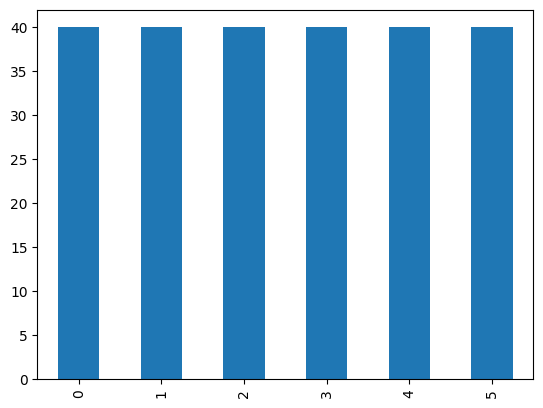

In [ ]:
# Bar chart to visualize the count of stars with respective type

star_df['Star type'].value_counts().plot(kind = 'bar')

plt.show()

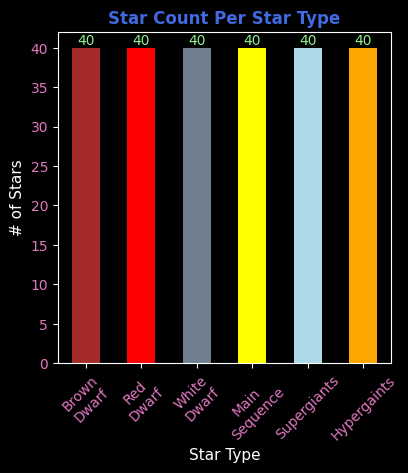

In [ ]:
# Customize the plot
plt.figure(figsize=(4.3,4.3))

plt.style.use('dark_background')

ax = star_df['Star type'].value_counts().plot(kind = 'bar', color = ['brown', 'red','slategray','yellow', 'lightblue', 'orange'])

ax.bar_label(ax.containers[0], color = 'lightgreen')

plt.title('Star Count Per Star Type', color = 'royalblue', weight = 'bold')

plt.xticks(ticks = [0,1,2,3,4,5],
           labels = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergaints'],
           color = 'tab:pink',
           rotation = 45)

plt.yticks(color = 'tab:pink')

plt.xlabel('Star Type', color = 'white', fontsize = 11)

plt.ylabel('# of Stars', color = 'white', fontsize = 11)

plt.savefig(base_dir + 'barplot_star_count')

plt.show()

##### Matplotlib + Seaborn

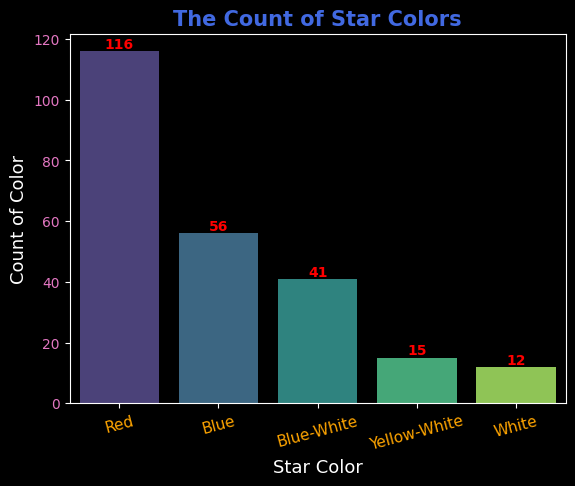

In [65]:
# Visulaising the Star color data

ax = sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            hue = star_df['Star color'].value_counts().index,
            legend = False,
            palette = 'viridis')

for i in ax.containers:
    ax.bar_label(i, color='red', weight='bold')

plt.title('The Count of Star Colors', color='royalblue', fontsize=15, weight='bold')

plt.xticks(rotation=15, color='orange', fontsize=11)

plt.ylabel('Count of Color',color='white', fontsize=13)

plt.xlabel('Star Color',color='white', fontsize=13)

plt.yticks(color='tab:pink')

plt.savefig(base_dir+'star_colors_viz.png')

plt.show()


#### Visualize outliers if any by creating boxplots for numeric features

In [66]:
# Get a gist of the data again by checking the top 5 rows of the data

star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


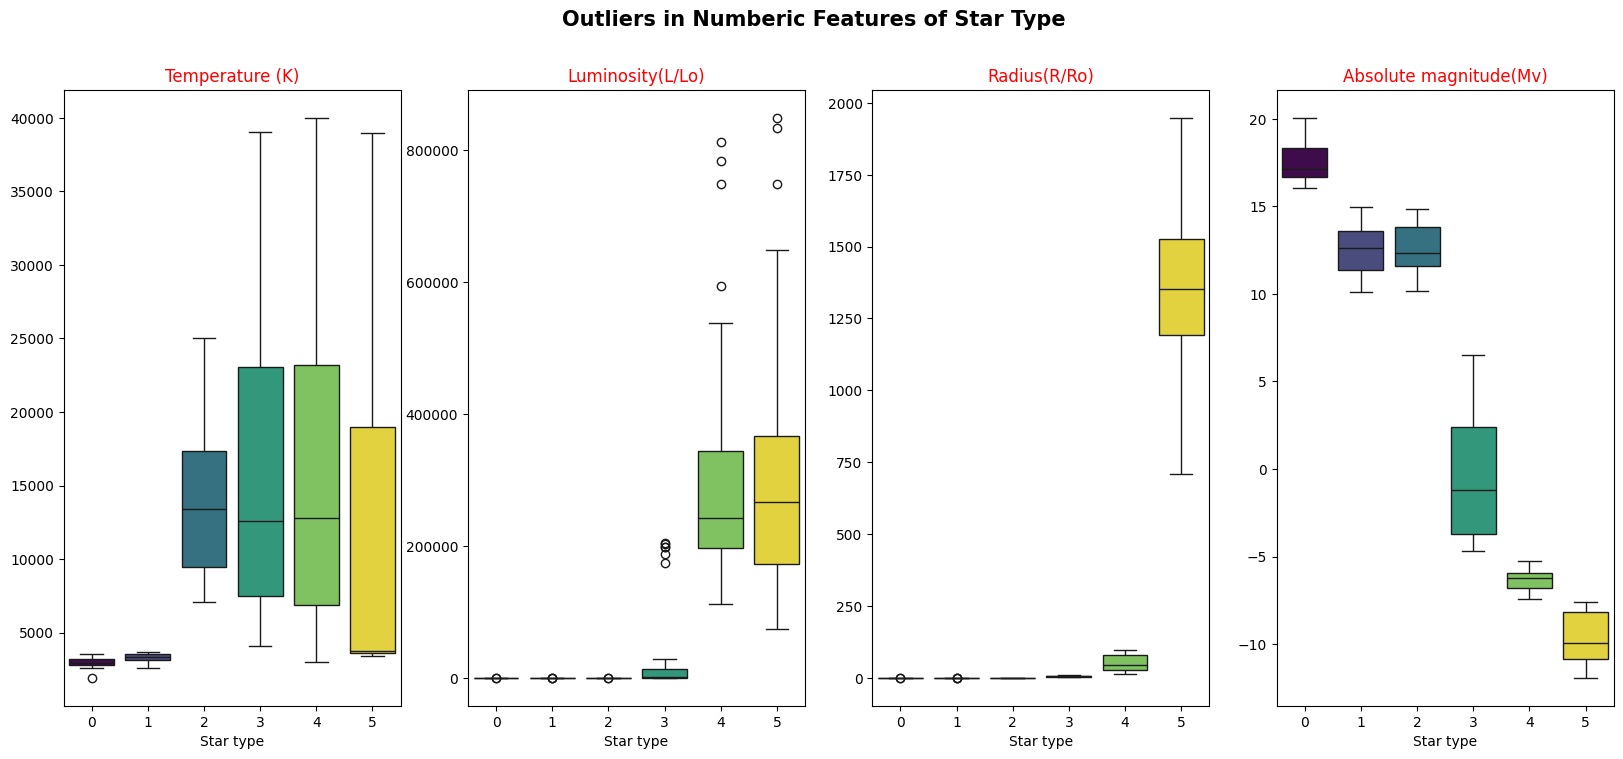

In [86]:
# Visualize Outliers in the Data

plt.figure(figsize = (20,8))
plt.style.use('default')
plt.suptitle('Outliers in Numberic Features of Star Type',
             color = 'black', weight = 'bold', fontsize = 15)

# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i], hue = star_df['Star type'], palette='viridis', legend = False)
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

plt.savefig(base_dir+'boxplot_star_type.png')


#### Create line plots

In [92]:
def line_subplot(star_df, colors, i):
  """
  This will create subplot within for loop

  Parameters
  ----------
  - star_df: data frame
  - colors: colors to display on plot
  - i: index of the iteration

  Generates
  ------
  - subplot on all axes with respective plots and titles
  """
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:,i], color=colors[i])
  plt.title(star_df.columns[i], color='red')

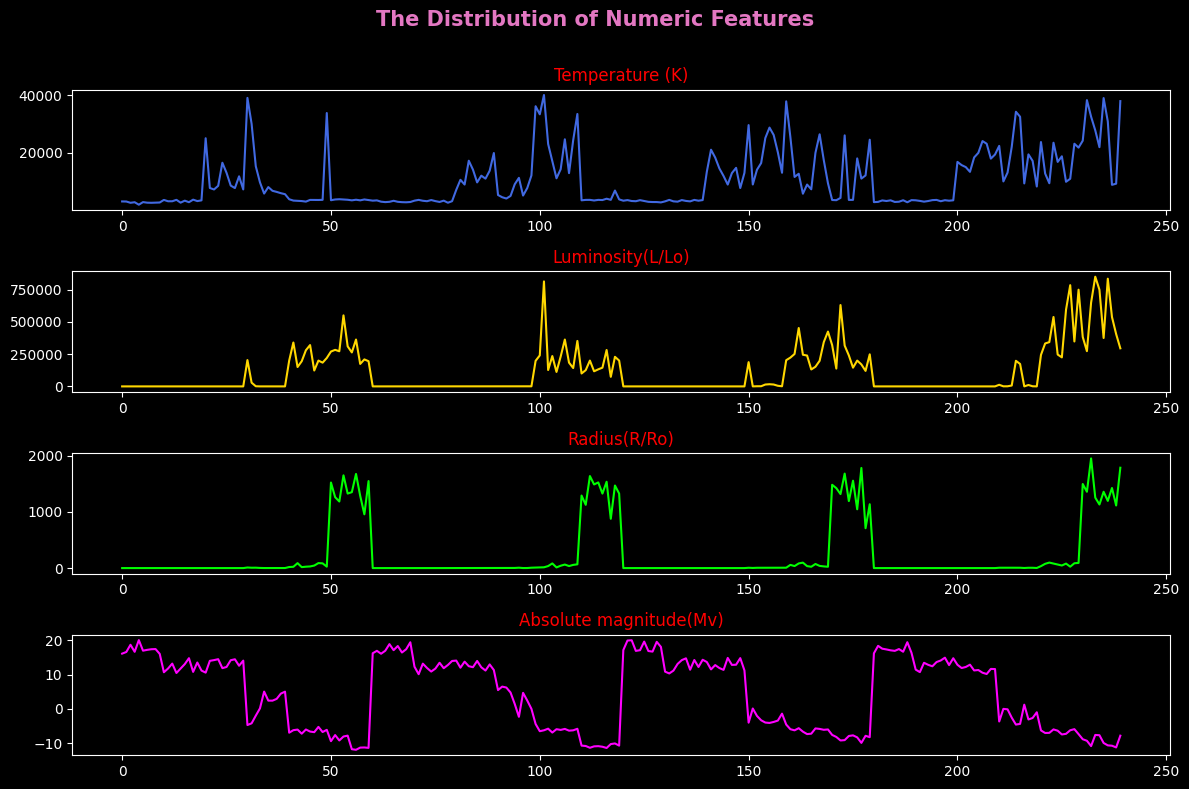

In [99]:
# Line Plots

plt.style.use('dark_background')

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('The Distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()



#### Create a pairplot

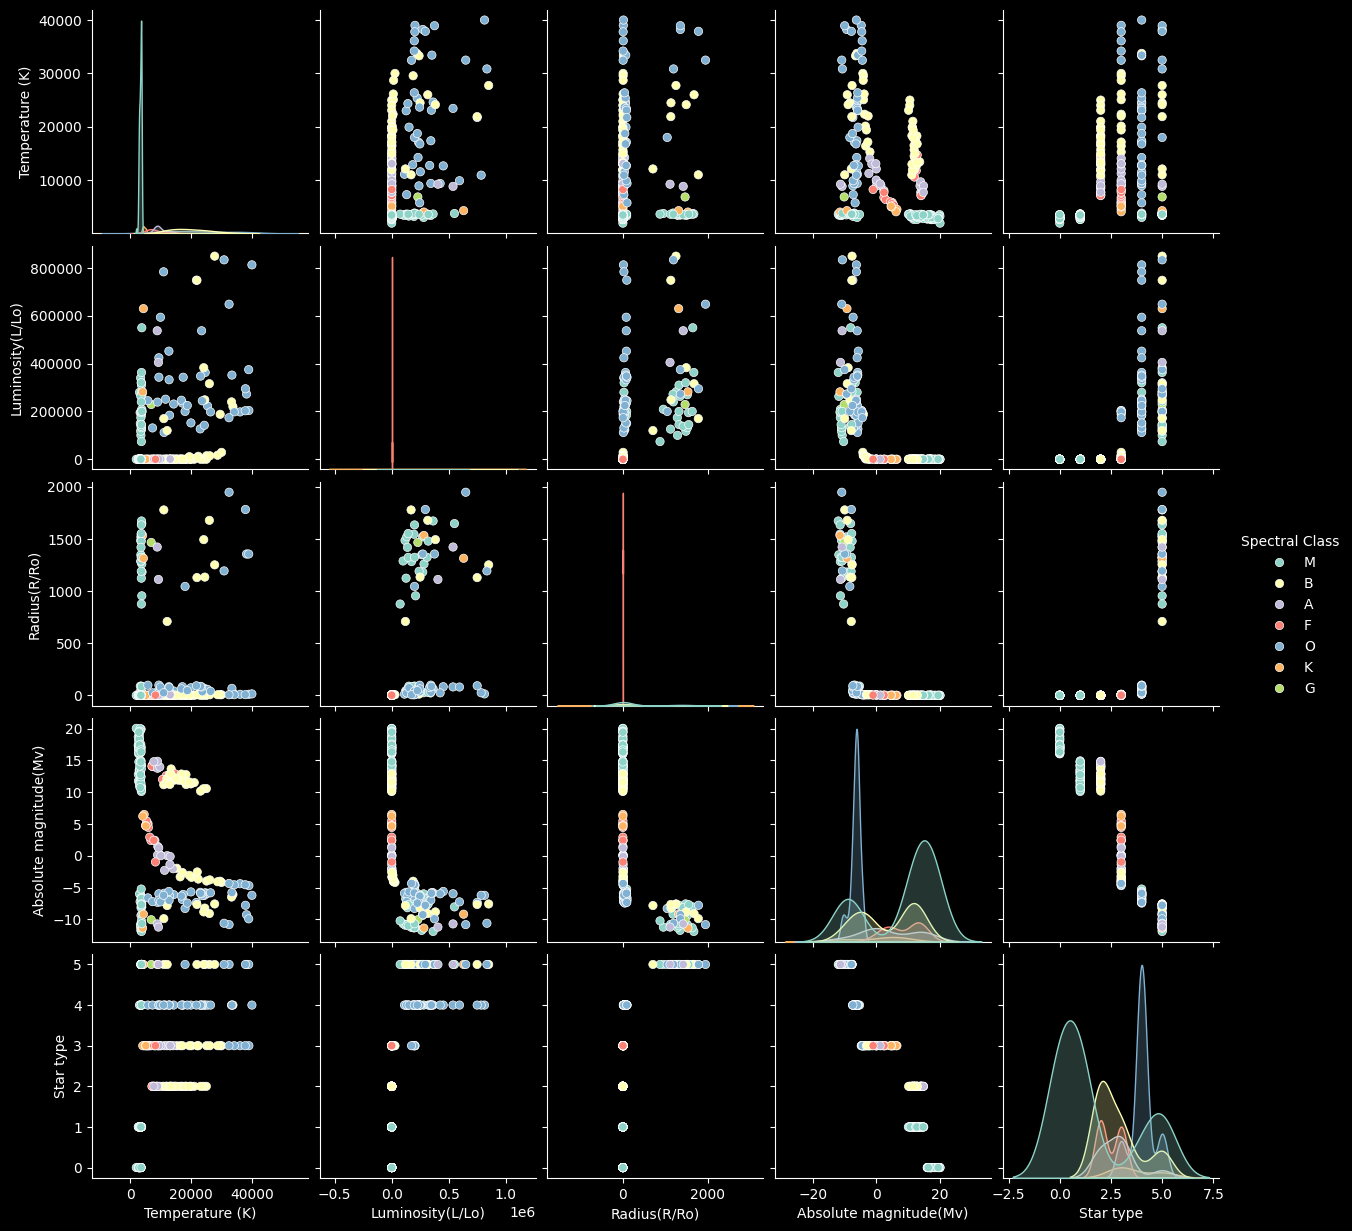

In [98]:
plt.style.use('dark_background')

sns.pairplot(star_df, hue = 'Spectral Class')

plt.savefig(base_dir + 'pairplot.png')

plt.show()

#### Create a scatter plot of Hertzsprug-Russell (HR) diagram


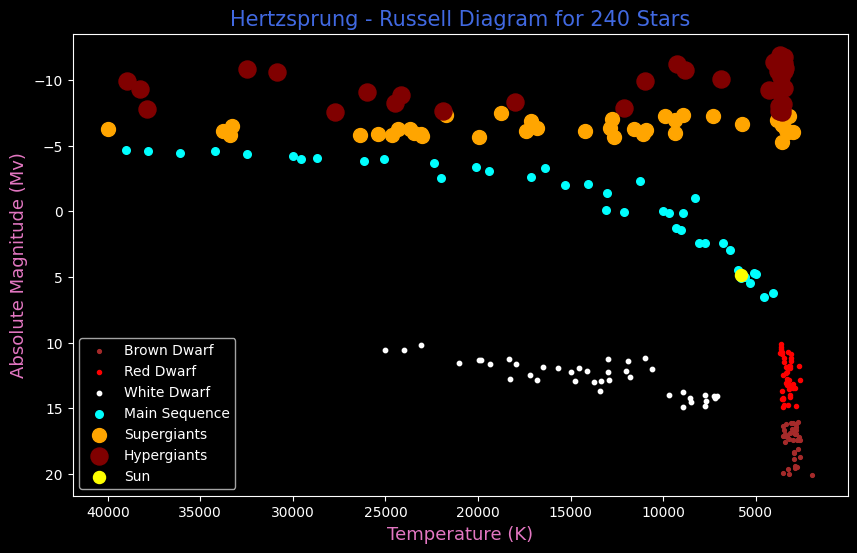

In [110]:
# Plotting a HR for Temp vs Abs mag

star_type = star_df['Star type'].values

temperature = star_df['Temperature (K)'].values

abs_mag = star_df['Absolute magnitude(Mv)'].values

# Python dictionaires --> Made of key value pairs

star_types = {

    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

axes = []

labels = set ()

plt.figure(figsize = (10,6))

for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
        s = properties['size'],
        c = properties['color'] ,
        marker = properties['marker'] ,
        label = properties['label'])

    axes.append(ax)
    labels.add(properties['label'])
  else:
      ax = plt.scatter(temperature[i], abs_mag[i],
          s = properties['size'],
          c = properties['color'] ,
          marker = properties['marker'] ,
          label = properties['label'])

# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')

plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

plt.legend(handles = axes)

plt.gca().invert_xaxis()

plt.gca().invert_yaxis()

plt.savefig(base_dir+"hr_diagram.png")

plt.show()

### Extract the output folders

In [ ]:
'''This only work in Google Colab'''
from google.colab import files                            # import files from colab module of google
!zip -r /content/star_plots.zip /content/star_plots       # create a zip file of the folder in the same location where we created the base directory
files.download('/content/star_plots.zip')                 # download the zip file